# G2M insight for Cab Investment firm

## Client Description:

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Project Details:

We have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

Here are some of the hypotheses we will be exploring in this Jupyter Notebook:
1. The number of cab rides taken is higher in cities with higher populations.
2. Cab users are more likely to pay with cash than with card.
3. There is a correlation between the distance traveled and the fare charged. 
4. The number of cab rides has increased over the time period covered in the dataset.
5. One of the cab companies has a higher percentage of femal customers than the other.
6. The prices charged by cab companies increase over the time period covered in the dataset.

## Datasets:

We have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.
Below are the list of datasets which are provided for the analysis:

###### Cab_Data.csv – this file includes details of transaction for 2 cab companies
###### Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details
###### Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode
###### City.csv – this file contains list of US cities, their population and number of cab users

## Import libraries and load datasets

In this section, necessary libraries such as pandas, matplotlib, seaborn, and numpy are imported. These libraries will be used throughout the notebook for data manipulation, visualisation, and analysis.

In [1]:
# Import necessary libraries
import pandas as pd
from datetime import datetime
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The datasets are then loaded into the notebook as dataframes. The datasets include the cab data, city data, customer ID data, and the transaction ID data.

In [2]:
# Load the data sets
cab_df = pd.read_csv('DataSets/Cab_Data.csv')
customer_df = pd.read_csv('DataSets/Customer_ID.csv')
transaction_df = pd.read_csv('DataSets/Transaction_ID.csv')
city_df = pd.read_csv('DataSets/City.csv')

### Data Exploration

In this section, the datasets are explored to get a better understanding of the data. Some of the explorations include checking for missing values, checking the number of unique values, and getting the statistical summary of the data.

In [3]:
# Explore the cab dataset
print("\nCab data shape: ", cab_df.shape)
print("\nCab data head: \n", cab_df.head())
print("\nCab data info: \n", cab_df.info())
print("\nCab data description: \n", cab_df.describe())

# Explore the customer dataset
print("\nCustomer data shape: ", customer_df.shape)
print("\nCustomer data head: \n", customer_df.head())
print("\nCustomer data info: \n", customer_df.info())
print("\nCustomer data description: \n", customer_df.describe())

# Explore the transation dataset
print("\nTransaction data shape: ", transaction_df.shape)
print("\nTransaction data head: \n", transaction_df.head())
print("\nTransaction data info: \n", transaction_df.info())
print("\nTransaction data description: \n", transaction_df.describe())

# Explore the city dataset
print("\nCity data shape: ", city_df.shape)
print("\nCity data head: \n", city_df.head())
print("\nCity data info: \n", city_df.info())
print("\nCity data description: \n", city_df.describe())


Cab data shape:  (359392, 7)

Cab data head: 
    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         

## Data Cleaning and Reformating:

In this section, the datasets are cleaning to prepare them for analysis. Some of the cleaning tasks include dropping unecessary columns, converting data types, and merging datasets.

The date format on the Cab_Data.csv dataset is not in the correct format so after loading the datasets, we created a function to modify the format of the 'Date to Travel' column so that it matches the following format:"d-m-Y". We then create a new column in the dataframe with the updated travel date.

In [4]:
def format_to_date(date):
    date_of_travel =(datetime(1899,12,30) + timedelta(date-1)).strftime("%d-%m-%Y")
    updated_date =  datetime.strptime(date_of_travel, "%d-%m-%Y")
    return updated_date

In [5]:
cab_df['Updated date of travel'] = cab_df['Date of Travel'].apply(lambda x:format_to_date(x))
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Updated date of travel
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02


Next we check for missing values in each dataset and if there are missing values, we will fill them. If not we will continue with our data cleaning.

In [6]:
# Check for missing values in each data set
print("\nMissing values in Cab data: \n", cab_df.isnull().sum())
print("\nMissing values in Customer data: \n", customer_df.isnull().sum())
print("\nMissing values in Transaction data: \n", transaction_df.isnull().sum())
print("\nMissing values in City data: \n", city_df.isnull().sum())


Missing values in Cab data: 
 Transaction ID            0
Date of Travel            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Updated date of travel    0
dtype: int64

Missing values in Customer data: 
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Missing values in Transaction data: 
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Missing values in City data: 
 City          0
Population    0
Users         0
dtype: int64


No values were found missing so the next step will be to merge the datasets based on common features. 

In [7]:
# Merge the data sets based on the common keys
merged_df = pd.merge(cab_df, transaction_df, on='Transaction ID')
merged_df = pd.merge(merged_df, city_df, on='City')
merged_df = pd.merge(merged_df, customer_df, on = 'Customer ID')
print("\nMerged data set shape: ", merged_df.shape)


Merged data set shape:  (359392, 15)


In [8]:
# Explore the merged dataset
print("\nmerged data shape: ", merged_df.shape)
print("\nmerged data head: \n", merged_df.head())
print("\nmerged data info: \n", merged_df.info())
print("\nmerged data description: \n", merged_df.describe())


merged data shape:  (359392, 15)

merged data head: 
    Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip Updated date of travel  Customer ID  \
0         370.95      313.6350             2016-01-07        29290   
1         598.70      317.4228             2018-07-20        29290   
2         792.05      597.4020             2018-11-22        29290   
3         358.52      334.8540             2016-01-05        27703   
4         721.10      467.1192             2018-04-20        27703   

  Payment_Mode Population     Users Gender  Age  Income (USD/Month)  
0  

After merging the datasets, we check for any duplicates. If duplicates are found, they will be dropped. 

In [9]:
# Drop duplicate rows if any
if merged_df.drop_duplicates(inplace=True):
    print("\nMerged data set shape after dropping duplicates: ", merged_df.shape)
else:
    print("\nNo duplicates to drop.")


No duplicates to drop.


In [10]:
merged_df.sort_values(by='Updated date of travel', inplace=True)
merged_df.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Updated date of travel,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
325663,10436500,43465,Yellow Cab,WASHINGTON DC,11.00,166.49,132.0000,2018-12-30,53140,Card,"418,859","127,001",Female,40,7870
159597,10433435,43465,Pink Cab,MIAMI FL,2.30,29.53,23.9200,2018-12-30,9774,Cash,"1,339,155","17,675",Female,33,14322
23407,10436696,43465,Pink Cab,BOSTON MA,27.55,377.85,330.6000,2018-12-30,60000,Cash,"248,968","80,021",Female,27,20303
117860,10433418,43465,Pink Cab,LOS ANGELES CA,2.34,29.21,25.0380,2018-12-30,7650,Card,"1,595,037","144,132",Female,32,17629
87418,10434637,43465,Yellow Cab,CHICAGO IL,3.36,44.86,43.9488,2018-12-30,5926,Card,"1,955,130","164,468",Male,58,31841


## Data Visualisations:

In this section, the cleaned dataset is visualised to better understand the data and answer some questions related to the cab investment firm case study. Some of the visualisation include the number of rides by company, the number of rides by payment mode, the number of rides by city, and the average proce charged and cost of trip by company. 

In our merged table, we can see that the price charged by the cab companies is different from the cost of the trips. It would be interesting for us to have. a preview of the profits made for each trip.

In [11]:
merged_df['Profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Updated date of travel,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month),Profit
12812,10000429,42371,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,2016-01-01,57474,Card,"248,968","80,021",Male,34,16558,137.1860
43828,10000525,42371,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,2016-01-01,4551,Cash,"1,955,130","164,468",Male,19,6316,25.0484
297325,10001234,42371,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,2016-01-01,38146,Cash,"671,238","25,063",Male,36,6577,577.9420
316639,10001311,42371,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,2016-01-01,53048,Card,"418,859","127,001",Male,23,31566,233.9280
171893,10000927,42371,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,2016-01-01,1808,Cash,"8,405,837","302,149",Male,59,18999,635.8876


In [12]:
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(int)
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)

city_df['Cab Users %'] = city_df['Users'] / city_df['Population'] * 100

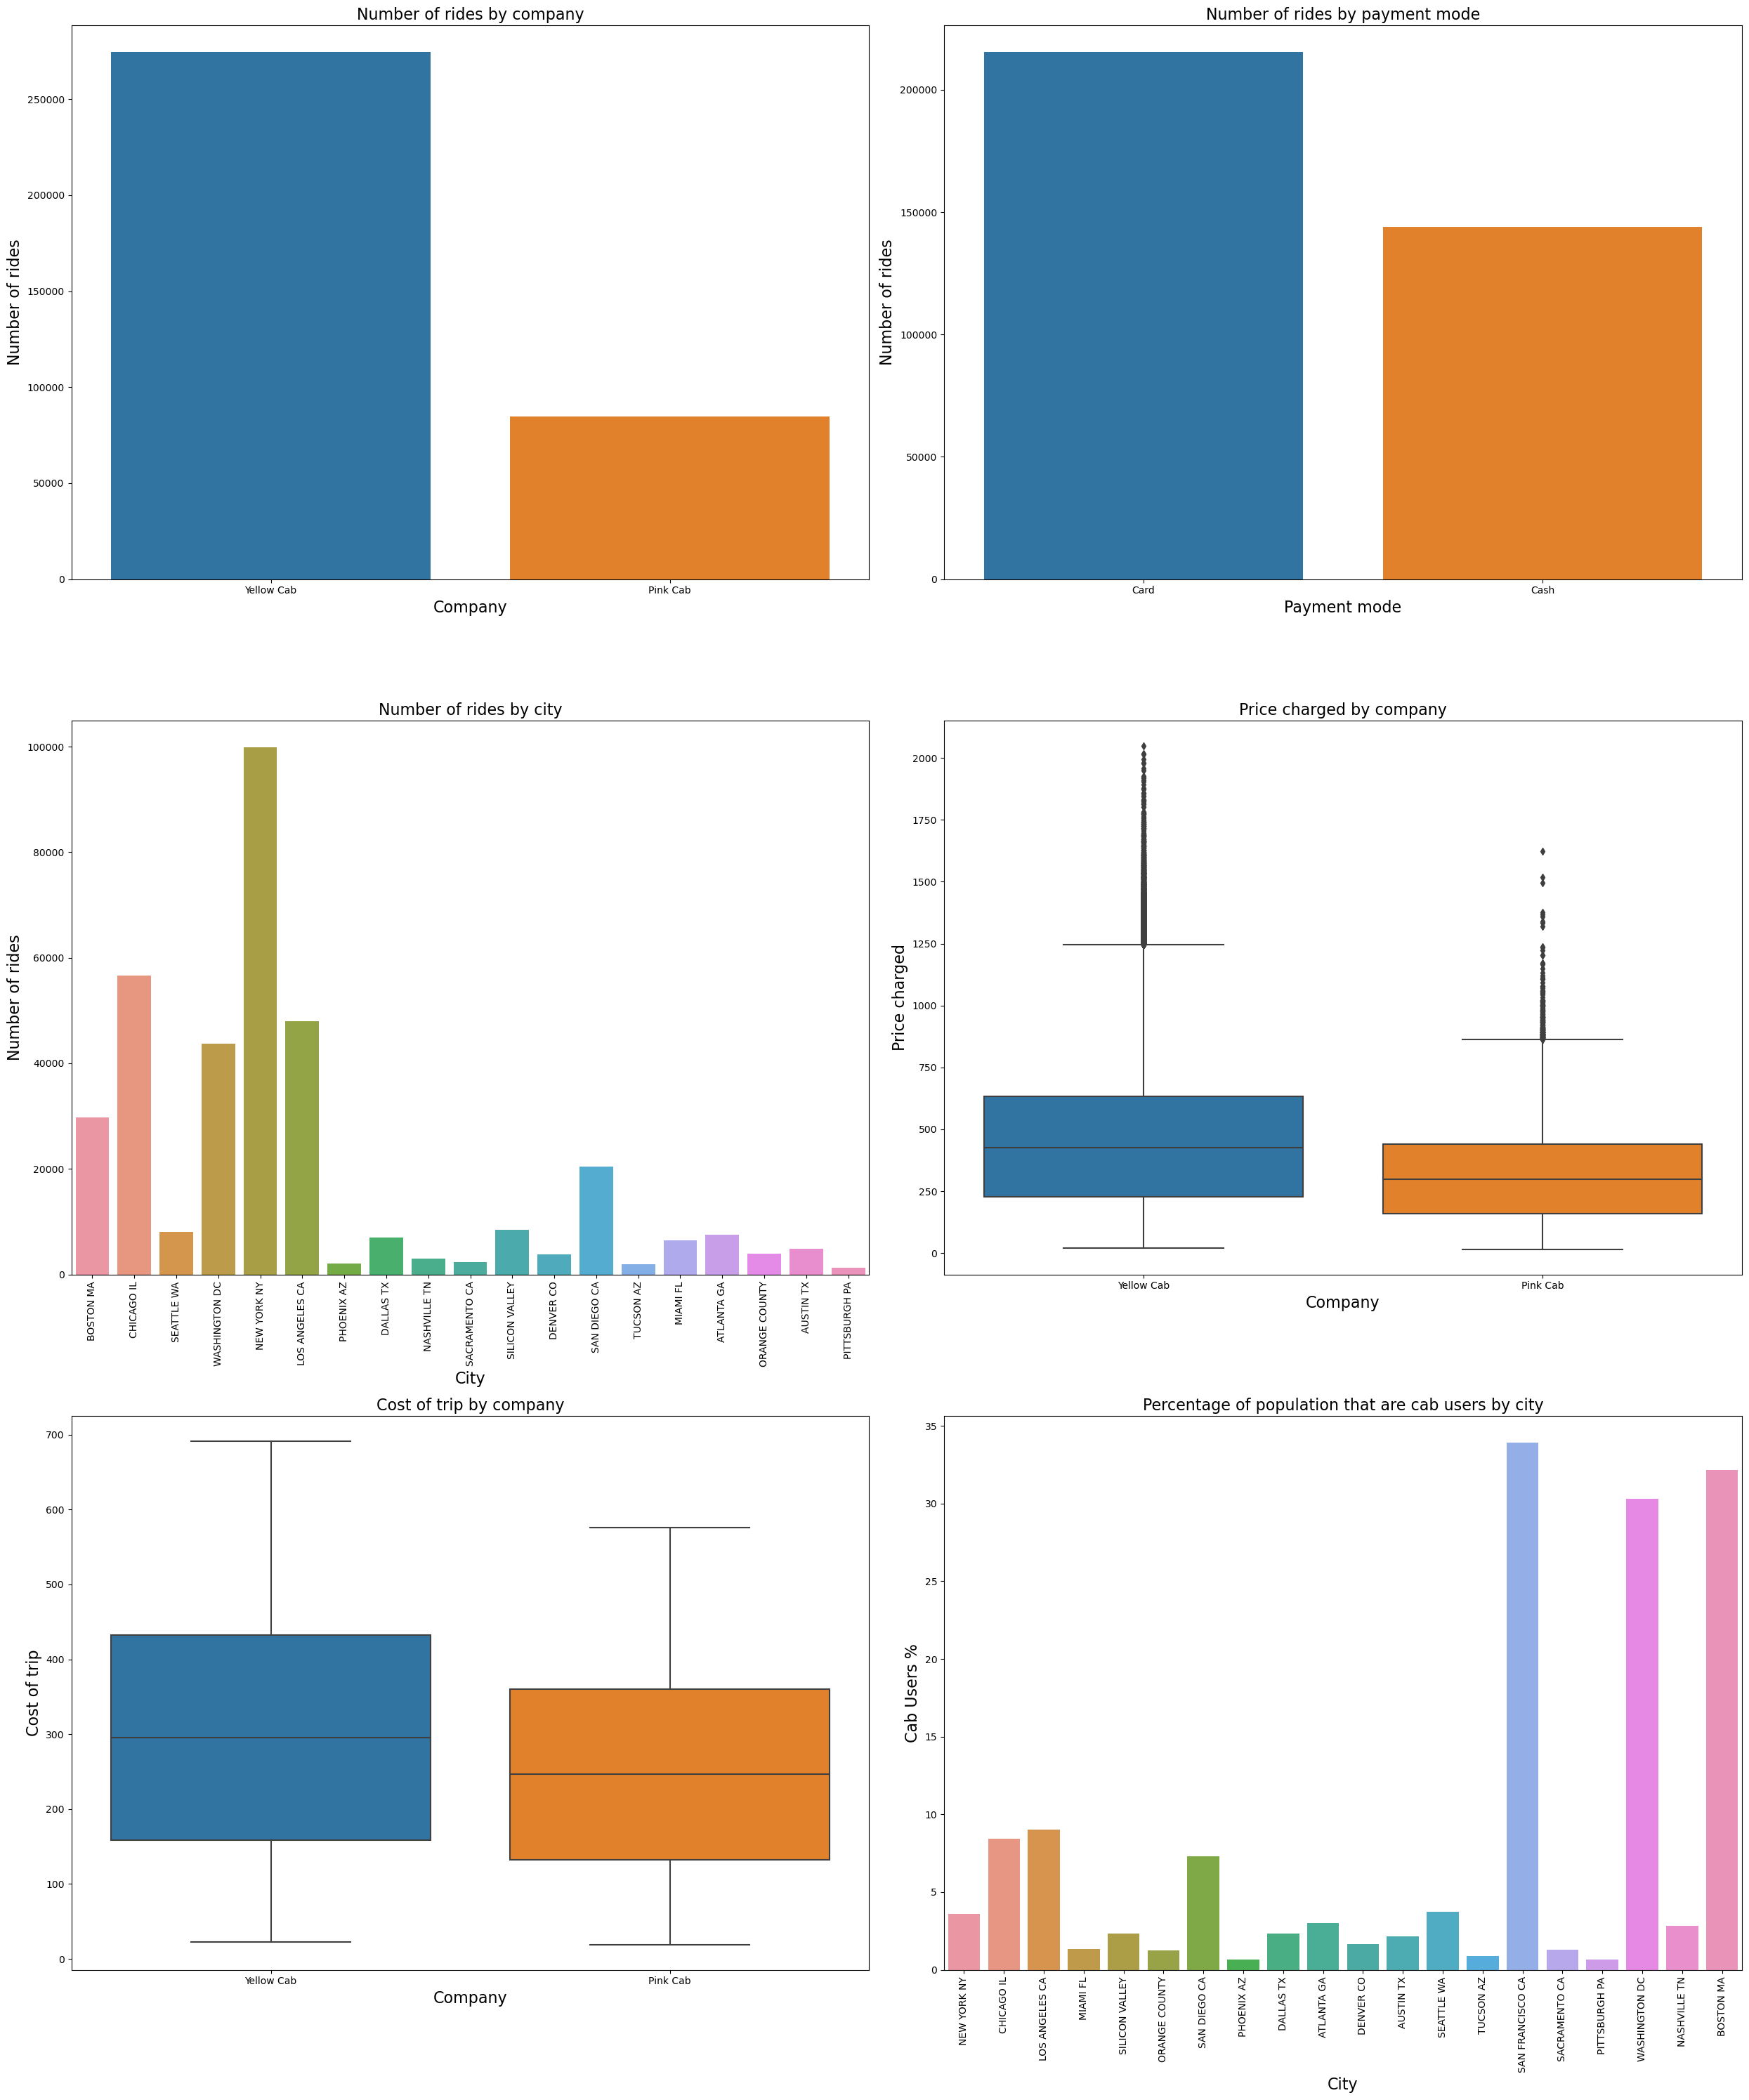

In [13]:
# Visualise the data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 30))

sns.countplot(x='Company', data = merged_df, ax=axs[0,0])
axs[0,0].set_title('Number of rides by company', fontsize = 16)
axs[0,0].set_xlabel('Company', fontsize = 16)
axs[0,0].set_ylabel('Number of rides', fontsize = 16)

#Cab users are more likely to pay with card than with cash.
sns.countplot(x='Payment_Mode', data = merged_df, ax=axs[0,1])
axs[0,1].set_title('Number of rides by payment mode', fontsize = 16)
axs[0,1].set_xlabel('Payment mode', fontsize = 16)
axs[0,1].set_ylabel('Number of rides', fontsize = 16)

sns.countplot(x='City', data = merged_df, ax=axs[1,0])
axs[1,0].set_title('Number of rides by city', fontsize = 16)
axs[1,0].set_xlabel('City', fontsize = 16)
axs[1,0].set_ylabel('Number of rides', fontsize = 16)
axs[1,0].tick_params(axis='x', rotation=90)

sns.boxplot(x='Company', y='Price Charged', data = merged_df, ax=axs[1,1])
axs[1,1].set_title('Price charged by company', fontsize = 16)
axs[1,1].set_xlabel('Company', fontsize = 16)
axs[1,1].set_ylabel('Price charged', fontsize = 16)

sns.boxplot(x='Company', y='Cost of Trip', data = merged_df, ax=axs[2,0])
axs[2,0].set_title('Cost of trip by company', fontsize = 16)
axs[2,0].set_xlabel('Company', fontsize = 16)
axs[2,0].set_ylabel('Cost of trip', fontsize = 16)

sns.barplot(x= 'City', y='Cab Users %', data=city_df, ax=axs[2,1])
axs[2,1].set_title('Percentage of population that are cab users by city', fontsize = 16)
axs[2,1].set_xlabel('City', fontsize = 16)
axs[2,1].set_ylabel('Cab Users %', fontsize = 16)
axs[2,1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()

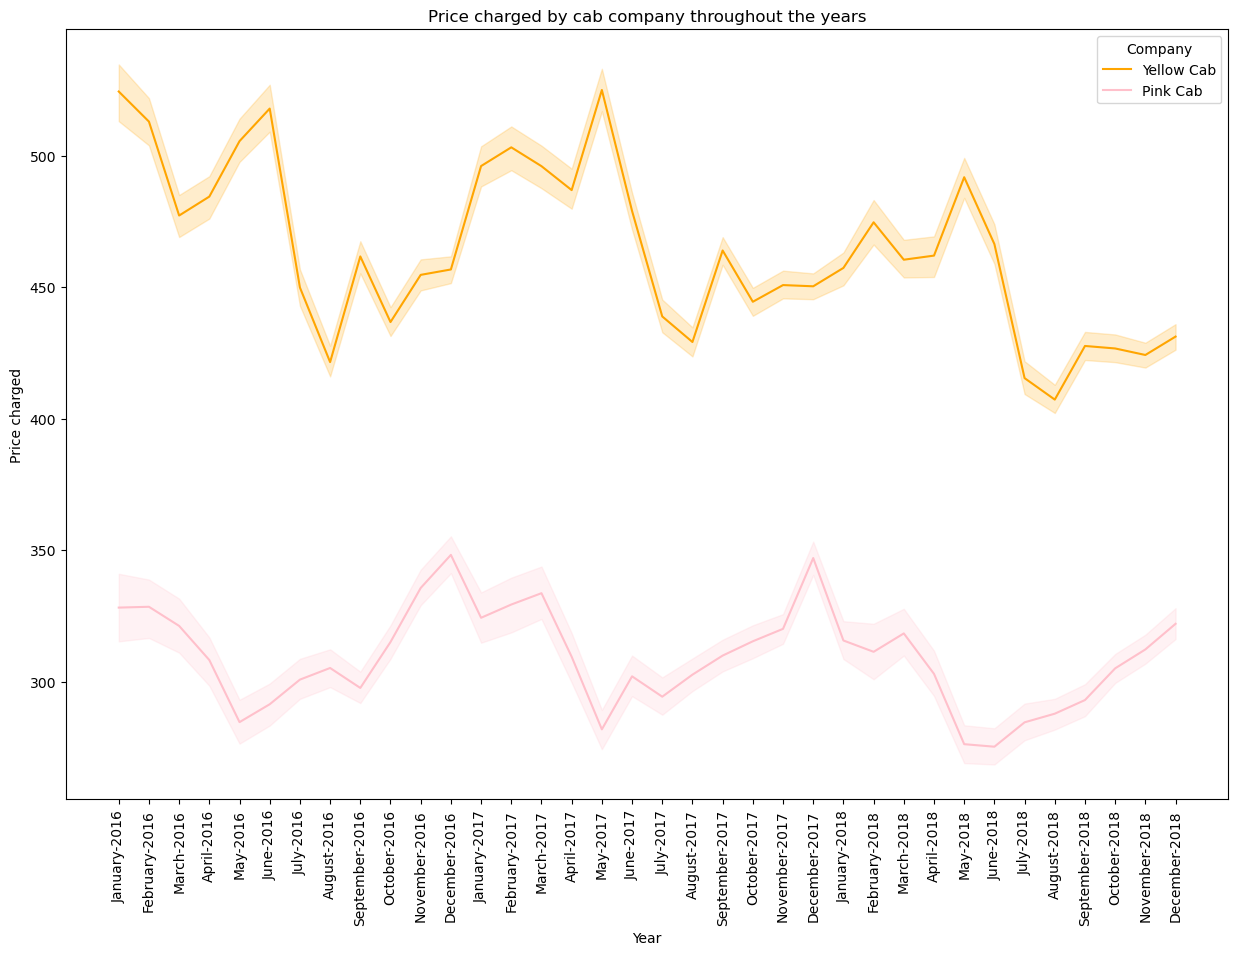

In [14]:
#The prices charged by cab companies increase over the time period covered
price_charged_df = merged_df[['Updated date of travel', 'Company', 'Price Charged']]


# Create a line plot

plt.figure(figsize=(15,10))
sns.lineplot(data=price_charged_df, x=merged_df['Updated date of travel'].apply(lambda x: x.strftime('%B-%Y')), y='Price Charged', hue='Company', palette=['orange', 'pink'])
plt.title('Price charged by cab company throughout the years')
plt.xlabel('Year')
plt.ylabel('Price charged')
plt.tick_params(axis='x', rotation=90)


plt.show()

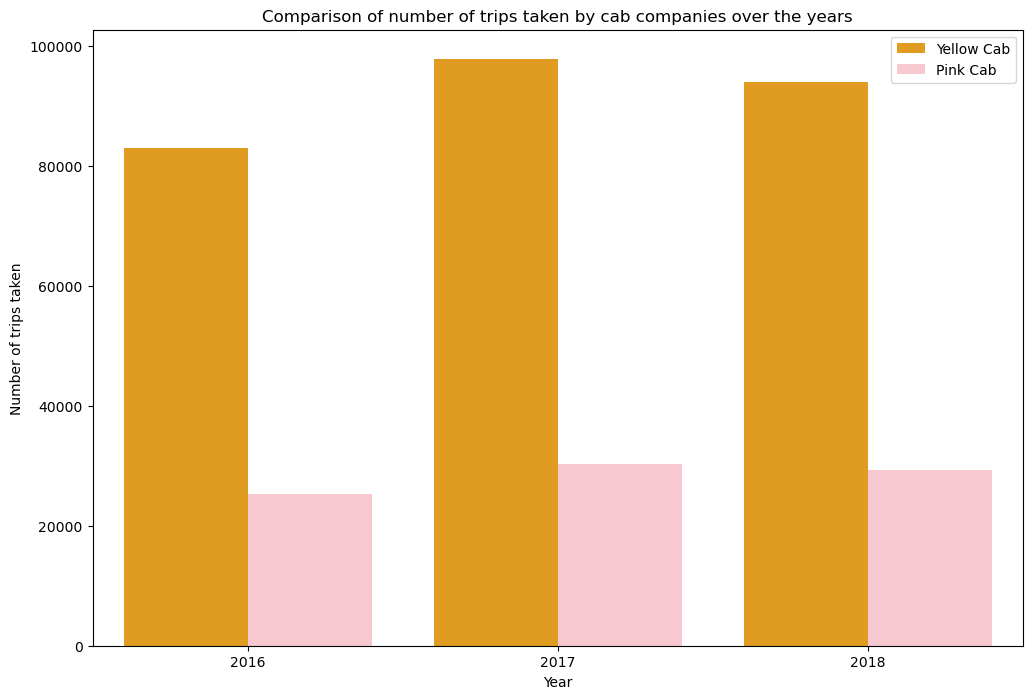

In [15]:
#The number of cab rides has increased over the time period covered in the dataset.
# Calculate and compare the number of trips taken by cab companies over the years 
merged_df['Year'] = merged_df['Updated date of travel'].dt.year

plt.figure(figsize=(12,8))
sns.countplot(data=merged_df, x='Year', hue='Company', palette=['orange', 'pink'])
plt.title('Comparison of number of trips taken by cab companies over the years')
plt.xlabel('Year')
plt.ylabel('Number of trips taken')
plt.legend()
plt.show()

In [16]:
# We calculate the average price charged by both cab companies per year
yellow_cab_avg_charged_prices = merged_df[merged_df['Company']=='Yellow Cab'].groupby('Year')['Price Charged'].mean()
pink_cab_avg_charged_prices = merged_df[merged_df['Company']=='Pink Cab'].groupby('Year')['Price Charged'].mean()
print("\nThe yearly average price charged by the Yellow Cab company are: \n", yellow_cab_avg_charged_prices)
print("\nThe yearly average price charged by the Pink Cab company are: \n", pink_cab_avg_charged_prices)


The yearly average price charged by the Yellow Cab company are: 
 Year
2016    468.230462
2017    466.278438
2018    440.893159
Name: Price Charged, dtype: float64

The yearly average price charged by the Pink Cab company are: 
 Year
2016    315.850071
2017    315.535059
2018    301.538134
Name: Price Charged, dtype: float64


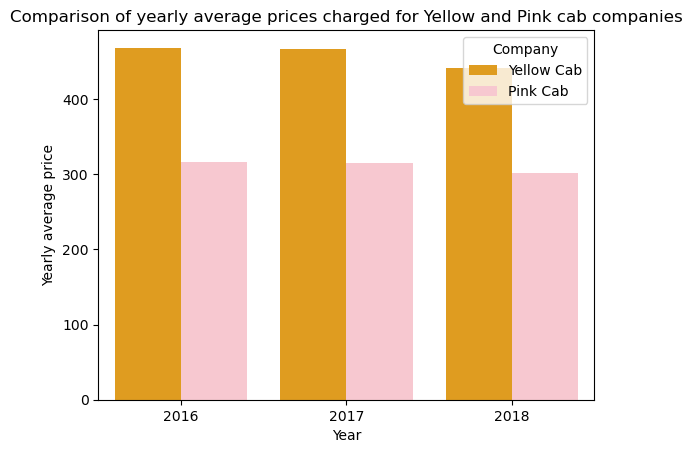

In [17]:
yellow_prices = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':yellow_cab_avg_charged_prices,
    'Company':'Yellow Cab'
})

pink_prices = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':pink_cab_avg_charged_prices,
    'Company':'Pink Cab'
})

prices = pd.concat([yellow_prices, pink_prices], ignore_index=True)
sns.barplot(data=prices, x='Year', y='Price', hue='Company', palette = ['orange', 'pink'])
plt.title('Comparison of yearly average prices charged for Yellow and Pink cab companies')
plt.ylabel('Yearly average price')

plt.show()

In [18]:
# We calculate the average cost of trip for both cab companies per year
yellow_cab_avg_trip_cost = merged_df[merged_df['Company']=='Yellow Cab'].groupby('Year')['Cost of Trip'].mean()
pink_cab_avg_trip_cost = merged_df[merged_df['Company']=='Pink Cab'].groupby('Year')['Cost of Trip'].mean()
print("\nThe yearly average cost for trips by the Yellow Cab company are: \n", yellow_cab_avg_trip_cost)
print("\nThe yearly average cost for trips by the Pink Cab company are: \n", pink_cab_avg_trip_cost)


The yearly average cost for trips by the Yellow Cab company are: 
 Year
2016    298.536761
2017    297.861544
2018    297.442400
Name: Cost of Trip, dtype: float64

The yearly average cost for trips by the Pink Cab company are: 
 Year
2016    247.039209
2017    248.820917
2018    248.413839
Name: Cost of Trip, dtype: float64


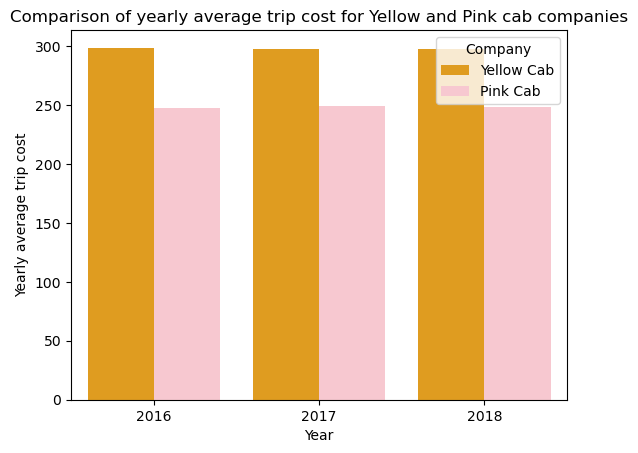

In [19]:
yellow_cost = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':yellow_cab_avg_trip_cost,
    'Company':'Yellow Cab'
})

pink_cost = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':pink_cab_avg_trip_cost,
    'Company':'Pink Cab'
})

prices = pd.concat([yellow_cost, pink_cost], ignore_index=True)
sns.barplot(data=prices, x='Year', y='Price', hue='Company', palette = ['orange', 'pink'])
plt.title('Comparison of yearly average trip cost for Yellow and Pink cab companies')
plt.ylabel('Yearly average trip cost')

plt.show()

In [20]:
# We calculate the average profits for both cab companies per year
yellow_cab_avg_profit = merged_df[merged_df['Company']=='Yellow Cab'].groupby('Year')['Profit'].mean()
pink_cab_avg_profit = merged_df[merged_df['Company']=='Pink Cab'].groupby('Year')['Profit'].mean()
print("\nThe yearly average profit made by the Yellow Cab company are: \n", yellow_cab_avg_profit)
print("\nThe yearly average profit made by the Pink Cab company are: \n", pink_cab_avg_profit)


The yearly average profit made by the Yellow Cab company are: 
 Year
2016    169.693701
2017    168.416894
2018    143.450759
Name: Profit, dtype: float64

The yearly average profit made by the Pink Cab company are: 
 Year
2016    68.810861
2017    66.714142
2018    53.124295
Name: Profit, dtype: float64


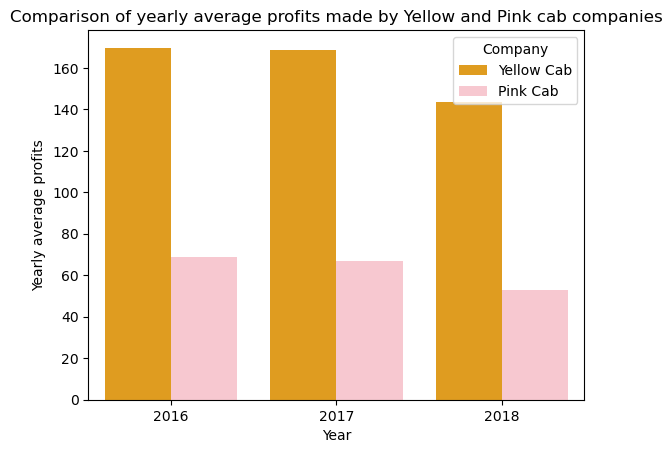

In [21]:
yellow_profit = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':yellow_cab_avg_profit,
    'Company':'Yellow Cab'
})

pink_profit = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':pink_cab_avg_profit,
    'Company':'Pink Cab'
})

prices = pd.concat([yellow_profit, pink_profit], ignore_index=True)
sns.barplot(data=prices, x='Year', y='Price', hue='Company', palette = ['orange', 'pink'])
plt.title('Comparison of yearly average profits made by Yellow and Pink cab companies')
plt.ylabel('Yearly average profits')

plt.show()

In [22]:
#One of the cab companies has a higher percentage of femal customers than the other.
# Calculate the percentage of men and women who took trips per year for each company
company_gender_year = merged_df.groupby(['Company', 'Gender', 'Year'])['KM Travelled'].count().reset_index()
company_gender_year['Percentage'] = company_gender_year.groupby(['Company', 'Year'])['KM Travelled'].apply(lambda x: 100 * x / float(x.sum()))

# Print the results
print(company_gender_year)

       Company  Gender  Year  KM Travelled  Percentage
0     Pink Cab  Female  2016         10965   43.365632
1     Pink Cab  Female  2017         13416   44.416487
2     Pink Cab  Female  2018         13099   44.827350
3     Pink Cab    Male  2016         14320   56.634368
4     Pink Cab    Male  2017         16789   55.583513
5     Pink Cab    Male  2018         16122   55.172650
6   Yellow Cab  Female  2016         34161   41.189095
7   Yellow Cab  Female  2017         41603   42.556696
8   Yellow Cab  Female  2018         40236   42.811087
9   Yellow Cab    Male  2016         48776   58.810905
10  Yellow Cab    Male  2017         56156   57.443304
11  Yellow Cab    Male  2018         53749   57.188913


/var/folders/k4/clqfsz8x0xv51knhq1n4z9hc0000gn/T/ipykernel_26868/349833129.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  company_gender_year['Percentage'] = company_gender_year.groupby(['Company', 'Year'])['KM Travelled'].apply(lambda x: 100 * x / float(x.sum()))


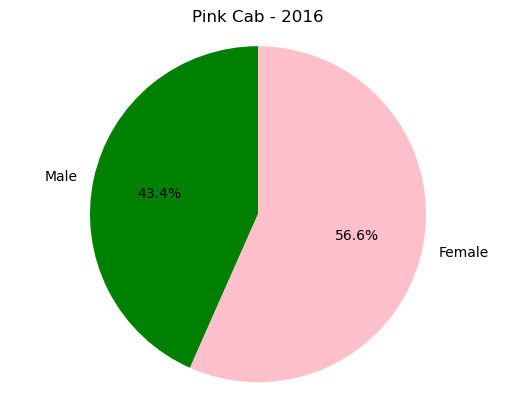

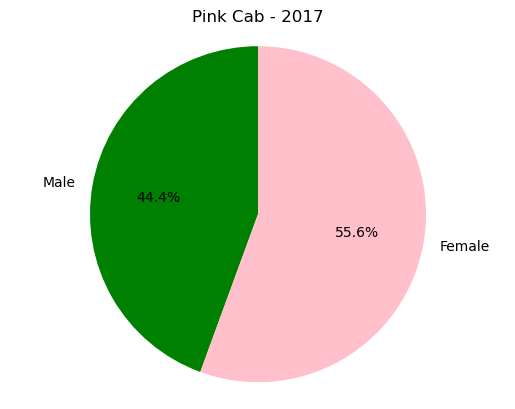

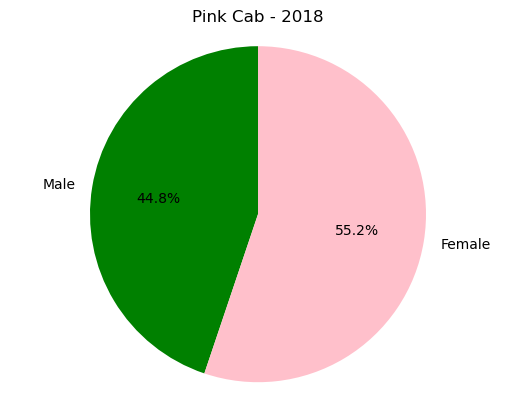

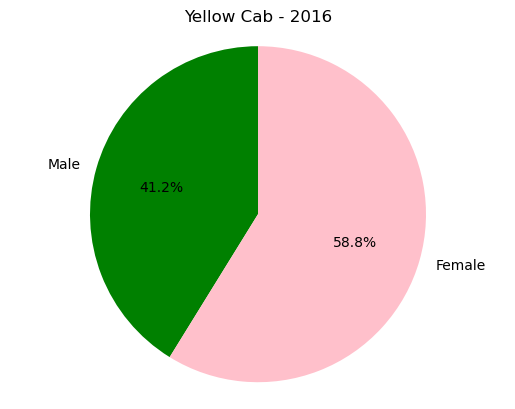

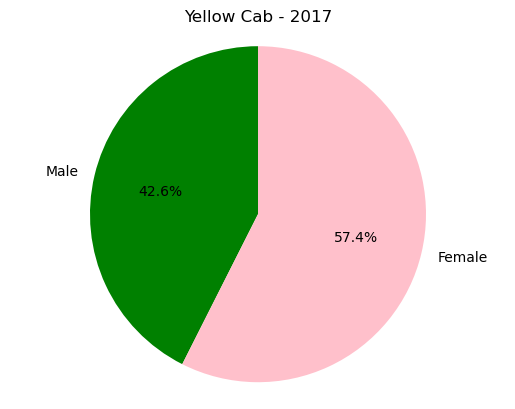

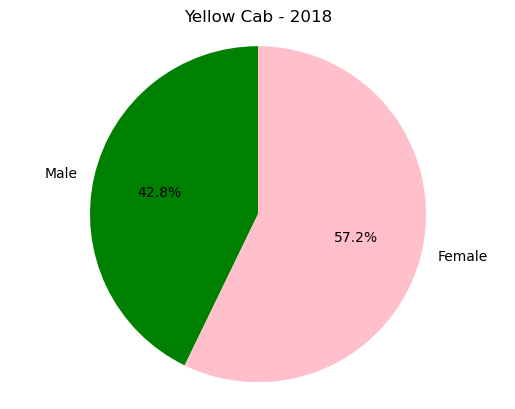

In [23]:
for company in company_gender_year['Company'].unique():
    for year in company_gender_year['Year'].unique():
        df = company_gender_year[(company_gender_year['Company'] == company) & (company_gender_year['Year'] == year)]
        labels = ['Male', 'Female']
        sizes = df['Percentage']
        colors = ['green', 'pink']
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title('{} - {}'.format(company, year))
        plt.show()

/var/folders/k4/clqfsz8x0xv51knhq1n4z9hc0000gn/T/ipykernel_26868/1939077981.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(merged_df['KM Travelled'], merged_df['Price Charged'], cmap='viridis', alpha=0.5)


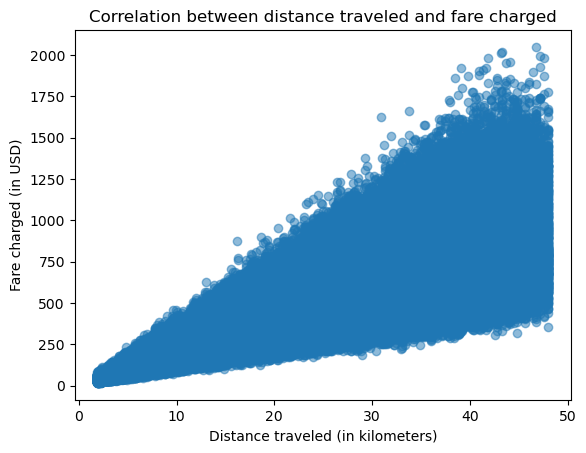

In [33]:
# Create a scatter plot of fare charged vs. distance traveled
plt.scatter(merged_df['KM Travelled'], merged_df['Price Charged'], cmap='viridis', alpha=0.5)

# Set the title and labels
plt.title('Correlation between distance traveled and fare charged')
plt.xlabel('Distance traveled (in kilometers)')
plt.ylabel('Fare charged (in USD)')

# Show the plot
plt.show()


/var/folders/k4/clqfsz8x0xv51knhq1n4z9hc0000gn/T/ipykernel_26868/538037284.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=rides_per_year, x=merged_df['Updated date of travel'].apply(lambda x: x.strftime('%B-%Y')),  palette=['orange', 'pink'])


KeyError: 'y'

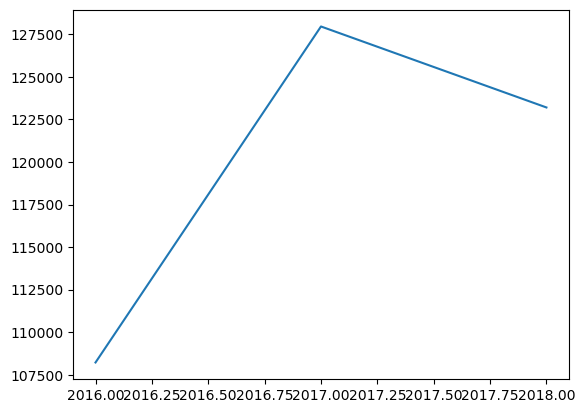

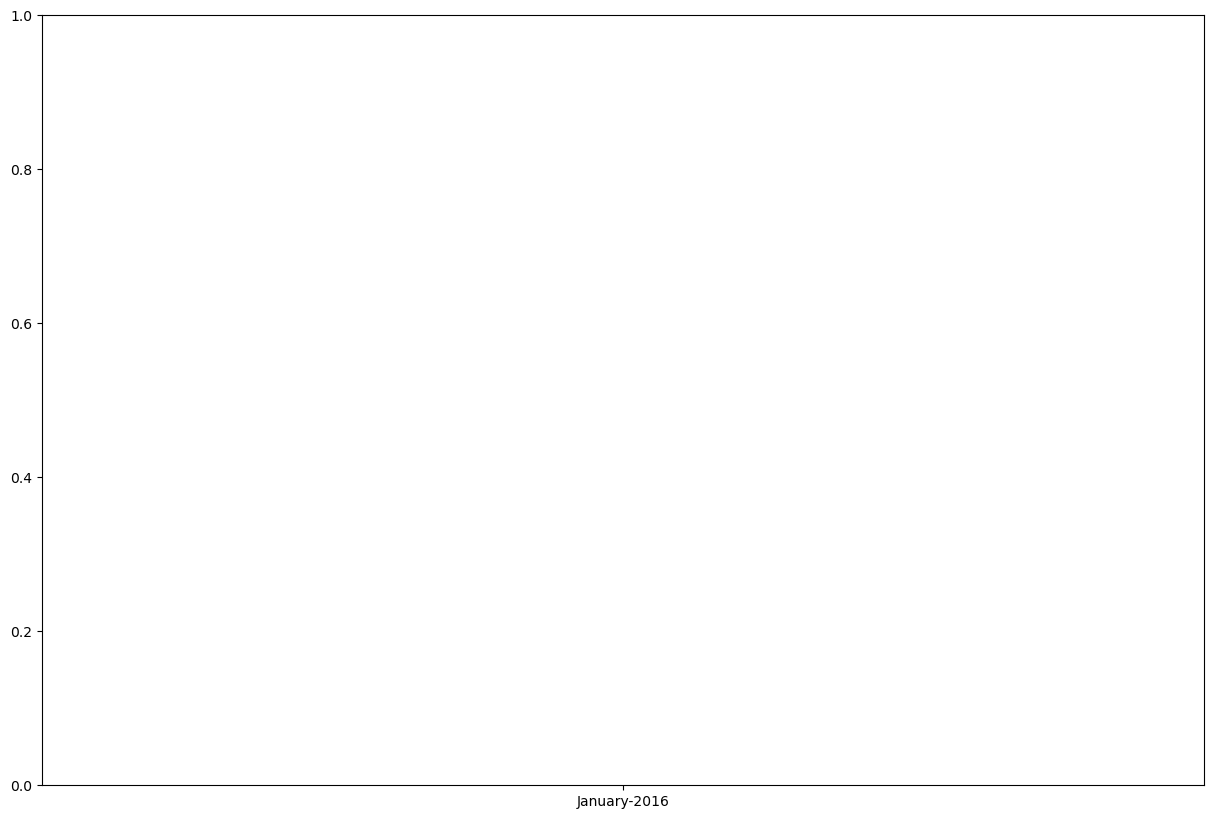

In [36]:
# Group the data by year and count the number of rides taken in each year
rides_per_year = merged_df.groupby('Year')['Transaction ID'].count()

# Create a line plot of the number of rides taken per year
plt.plot(rides_per_year.index, rides_per_year.values)

plt.figure(figsize=(15,10))
sns.lineplot(data=rides_per_year, x=merged_df['Updated date of travel'].apply(lambda x: x.strftime('%B-%Y')), y='N', hue='Company', palette=['orange', 'pink'])


# Set the title and axis labels
plt.title('Number of car rides taken per year')
plt.xlabel('Year')
plt.ylabel('Number of rides')

# Display the plot
plt.show()


In [ ]:
# # Explore the data using various visualizations
# sns.histplot(data=merged_df, x="KM Travelled")
# plt.xlabel("KM Travelled")

# sns.histplot(data=merged_df, x="Price Charged")
# plt.xlabel("Price Charged")

# sns.histplot(data=merged_df, x="Cost of Trip")
# plt.xlabel("Cost of Trip")

# sns.histplot(data=merged_df, x="Profit")
# plt.xlabel("Profit")
# plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()

## Insights and recommendations: